In [1]:
%load_ext autoreload
%autoreload 2
import uproot as ur
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
sys.path.append("/uscms/home/sbrightt/nobackup/iDM/iDMe_analysis/CMSSW_10_6_26/src/iDMeAnalysis/python_analysis/analysisTools")
import analysisTools as tools

In [2]:
t1 = tools.loadNano("from_aod_RegID.root")
t2 = tools.loadNano("from_aod_noRegID.root")

In [3]:
t1 = t1[ak.argsort(t1.eventNum)]
t2 = t2[ak.argsort(t2.eventNum)]

In [4]:
ak.all(t1.eventNum == t2.eventNum)

True

In [8]:
t1.LptElectron.pt

<Array [[], [1.42], [], ... 12.2], [1.78], []] type='307 * var * float32[paramet...'>

In [9]:
t2.LptElectron.pt

<Array [[], [], [], [], ... [10.2], [], []] type='307 * var * float32[parameters...'>

(0.0, 100.0)

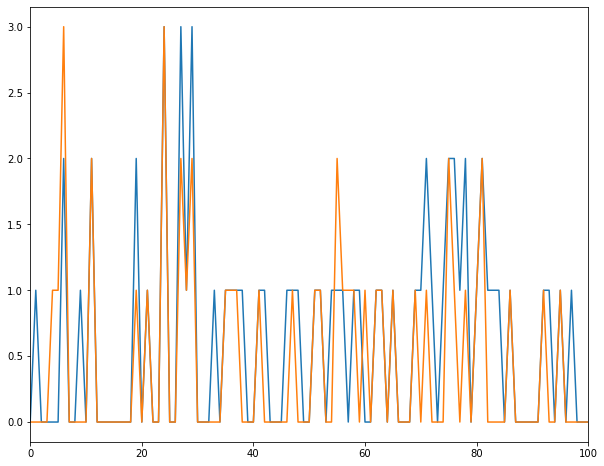

In [14]:
plt.figure(figsize=(10,8))
plt.plot(np.arange(307),ak.count(t1.LptElectron.pt,axis=1))
plt.plot(np.arange(307),ak.count(t2.LptElectron.pt,axis=1))
plt.xlim([0,100])

In [15]:
def checkEqual(t1,t2):
    fields = t1.fields
    for f in fields:
        b1 = t1[f]
        b2 = t2[f]
        if len(b1.fields) > 0:
            for f2 in b1.fields:
                #print("testing field {0}, {1}".format(f,f2))
                try:
                    bb1 = b1[f2]
                    bb2 = b2[f2]
                    if not ak.all(bb1 == bb2):
                        print("field {0} subfield {1} bad; max deviation {2}".format(f,f2,ak.max(bb1-bb2)))
                except:
                    print("field {0}, {1} couldn't be retrieved".format(f,f2))
        else:
            #print("testing field {0}".format(f))
            if not ak.all(b1==b2):
                print("field {0} bad, max deviation {1}".format(f,ak.max(b1-b2)))

In [16]:
checkEqual(t1,t2)

field LRvtx, idx1 couldn't be retrieved
field LRvtx, idx2 couldn't be retrieved
field LRvtx, vxy couldn't be retrieved
field LRvtx, sigmavxy couldn't be retrieved
field LRvtx, vx couldn't be retrieved
field LRvtx, vy couldn't be retrieved
field LRvtx, vz couldn't be retrieved
field LRvtx, reduced_chi2 couldn't be retrieved
field LRvtx, prob couldn't be retrieved
field LRvtx, dR couldn't be retrieved
field LRvtx, sign couldn't be retrieved
field LRvtx, pt couldn't be retrieved
field LRvtx, eta couldn't be retrieved
field LRvtx, phi couldn't be retrieved
field LRvtx, energy couldn't be retrieved
field LRvtx, m couldn't be retrieved
field LRvtx, px couldn't be retrieved
field LRvtx, py couldn't be retrieved
field LRvtx, pz couldn't be retrieved
field PFJet, CHEF couldn't be retrieved
field PFJet, NHEF couldn't be retrieved
field PFJet, CEEF couldn't be retrieved
field PFJet, NEEF couldn't be retrieved
field PFJet, corrNumDaughters couldn't be retrieved
field PFJet, corrCHM couldn't be ret